In [8]:
from sklearn.metrics import roc_curve

In [38]:
fpr, tpr, thresh = roc_curve(valid_labels[:,0], sklearn_data[-1][:,0])

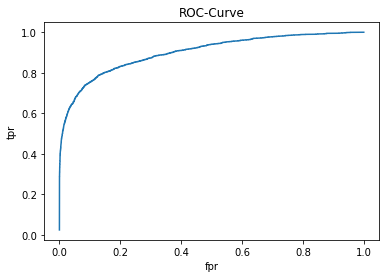

In [39]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.title('ROC-Curve')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [40]:
from sklearn.metrics import roc_auc_score
roc_auc_score(valid_labels[:,0], sklearn_data[-1][:,0])

0.90059739153992036

In [44]:
values = []
for i in range(len(sklearn_data)):
    values.append(roc_auc_score(valid_labels[:,0], sklearn_data[i][:,0]))

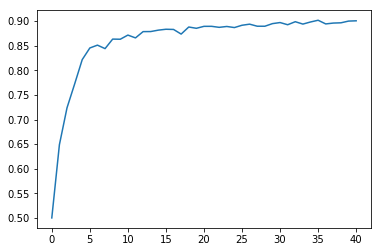

In [45]:
plt.plot(values)
plt.show()

In [6]:
# Import of every needed library
import pickle
import gzip
import numpy as np
import tensorflow as tf
import os
import random
from multiprocessing import Pool

path = '/fhgfs/users/jbehnken/randomized_Conv_Data' # Path to preprocessed data

# Load pickled data and split it into pictures and labels
def load_data(file):
    with gzip.open(path+'/'+file, 'rb') as f:
        data_dict = pickle.load(f)
    pic = data_dict['Image']
    lab = data_dict['Label']
    return (pic, lab)

# Pool-load pickled data and split it into pictures and labels (list)
p = Pool()
data = p.map(load_data, os.listdir(path)[:5])
pics, labs = zip(*data)
del data, p

# Concatenate the data to a single np.array
pic = np.concatenate(pics)
lab = np.concatenate(labs)
del pics, labs

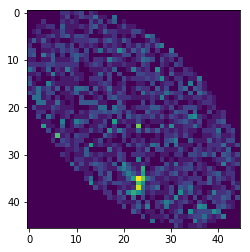

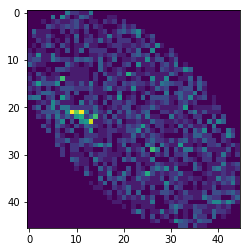

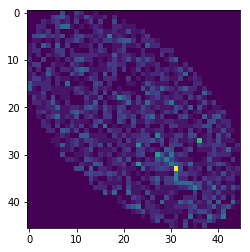

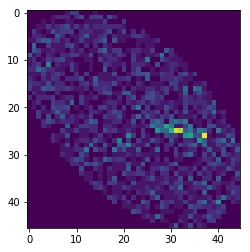

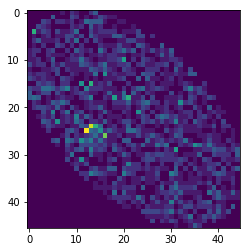

In [8]:
import matplotlib.pyplot as plt
for i in range(5):
    plt.imshow(pic[i,:,:,0])
    plt.show()

In [32]:
pic_sum = np.sum(pic, axis=0)

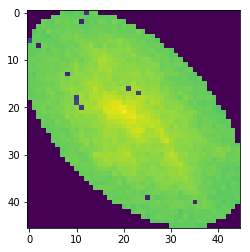

In [33]:
import matplotlib.pyplot as plt

plt.imshow(pic_sum[:, :, 0])
plt.show()

In [14]:
paths = []

main_path = '/net/big-tank/POOL/projects/fact/photon-stream/pass4/phs/'
with open('05_FACT_tf/real_data_paths.csv') as file:
    for line in file:
        l = line.split('\t')
        path = main_path + l[0][:4]+'/' + l[0][4:6]+'/' + l[0][6:8]+'/' + l[0][:4]+l[0][4:6]+l[0][6:8]+'_'+l[1].strip()+'.phs.jsonl.gz'
        paths.append(path)

In [21]:
import gzip

for path in paths:
    try:
        with gzip.open(path) as file:
    except:

In [17]:
import pandas as pd
import numpy as np

data = [[(1,2),(3,4),(5,6),(7,8)], [(1,2),(3,4),(5,6),(7,8)], [(1,2),(3,4),(5,6),(7,8)],[(1,2),(3,4),(5,6),(7,8)]]
np_data = np.array(data)

df = pd.DataFrame(np_data[:,:,1])

In [4]:
data = [[(1,2),(3,4),(5,6),(7,8)], [(1,2),(3,4),(5,6),(7,8)], [(1,2),(3,4),(5,6),(7,8)],[(1,2),(3,4),(5,6),(7,8)]]
data

[[(1, 2), (3, 4), (5, 6), (7, 8)],
 [(1, 2), (3, 4), (5, 6), (7, 8)],
 [(1, 2), (3, 4), (5, 6), (7, 8)],
 [(1, 2), (3, 4), (5, 6), (7, 8)]]

In [14]:
np_data = np.array(data)
np_data

array([[[1, 2],
        [3, 4],
        [5, 6],
        [7, 8]],

       [[1, 2],
        [3, 4],
        [5, 6],
        [7, 8]],

       [[1, 2],
        [3, 4],
        [5, 6],
        [7, 8]],

       [[1, 2],
        [3, 4],
        [5, 6],
        [7, 8]]])

In [15]:
df = pd.DataFrame(np_data[:,:,1])
df

,0,1,2,3
0,2,4,6,8
1,2,4,6,8
2,2,4,6,8
3,2,4,6,8


In [18]:
def reformat(labels):
    labels = (np.arange(2) == labels[:,None]).astype(np.float32)
    return labels

In [19]:
a = np.array([True, True, False, False, True])

In [24]:
reformat(a)

array([[ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.]], dtype=float32)

In [25]:
import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333) 
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))